# 🎯 SafeRL-Lite Demo: Constrained DQN on CartPole

This notebook demonstrates how to:
- Train a SafeDQN agent with a pole-angle safety constraint.
- Visualize violation metrics during training.
- Apply SHAP or Saliency-based explainability to analyze decisions.


In [4]:
%pip install numpy matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\simba\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [13]:
import pickle

episode_rewards = [10, 20, 30]
episode_penalties = [1, 2, 3]
violation_logs = [[1, 0, 0], [0, 0, 1], [1, 1, 1]]

with open("cartpole_run_logs.pkl", "wb") as f:
    pickle.dump({
        "rewards": episode_rewards,
        "penalties": episode_penalties,
        "violations": violation_logs,
    }, f)

In [14]:
import pickle

with open("D:\\saferl-lite\\saferl-lite\\notebooks\\cartpole_run_logs.pkl", "wb") as f:
    pickle.dump({
        "rewards": episode_rewards,
        "penalties": episode_penalties,
        "violations": violation_logs,
    }, f)

In [15]:
import pickle

with open("cartpole_run_logs.pkl", "rb") as f:
    logs = pickle.load(f)

rewards = logs["rewards"]
penalties = logs["penalties"]
violations = [sum(v) for v in logs["violations"]]  # total violations per episode

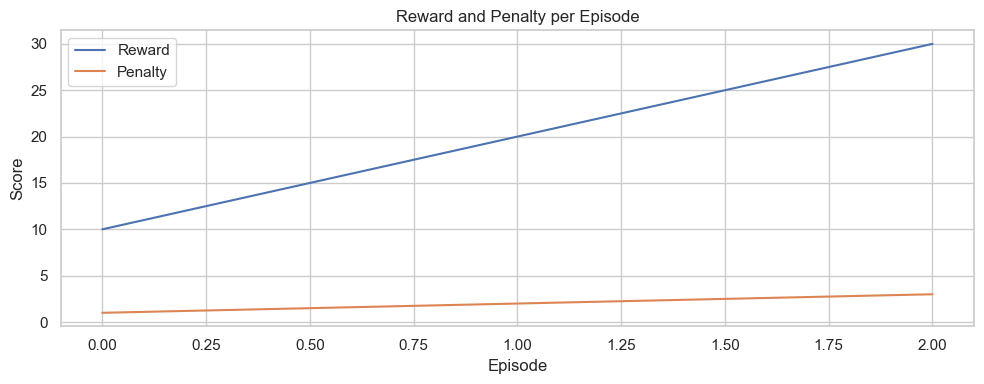

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(rewards, label="Reward")
plt.plot(penalties, label="Penalty")
plt.title("Reward and Penalty per Episode")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

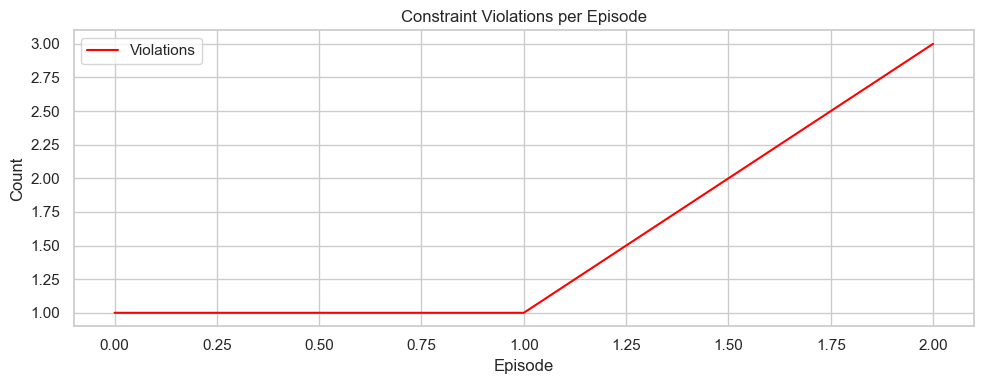

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(violations, color='red', label="Violations")
plt.title("Constraint Violations per Episode")
plt.xlabel("Episode")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

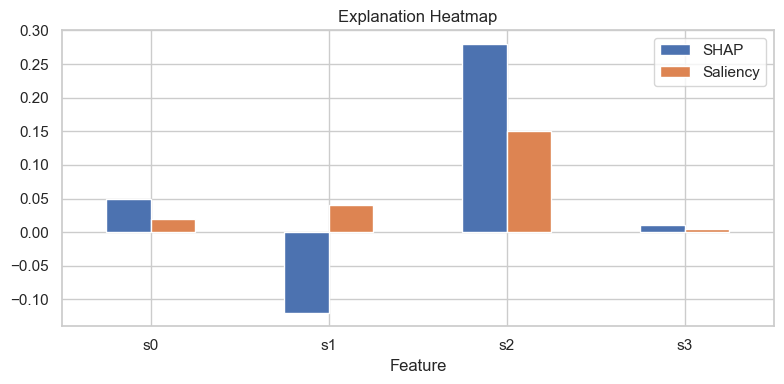

In [18]:
import pandas as pd

# Example: plot for last episode
feature_names = [f"s{i}" for i in range(4)]
shap_vals = np.array([0.05, -0.12, 0.28, 0.01])
saliency_vals = np.array([0.02, 0.04, 0.15, 0.005])

df = pd.DataFrame({
    "Feature": feature_names,
    "SHAP": shap_vals,
    "Saliency": saliency_vals
})

df.plot(x="Feature", kind="bar", figsize=(8, 4), title="Explanation Heatmap")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

with open("explanations.pkl", "rb") as f:
    data = pickle.load(f)

shap_vals = np.array(data["shap"])       # shape: [episodes, features]
saliency_vals = np.array(data["saliency"])

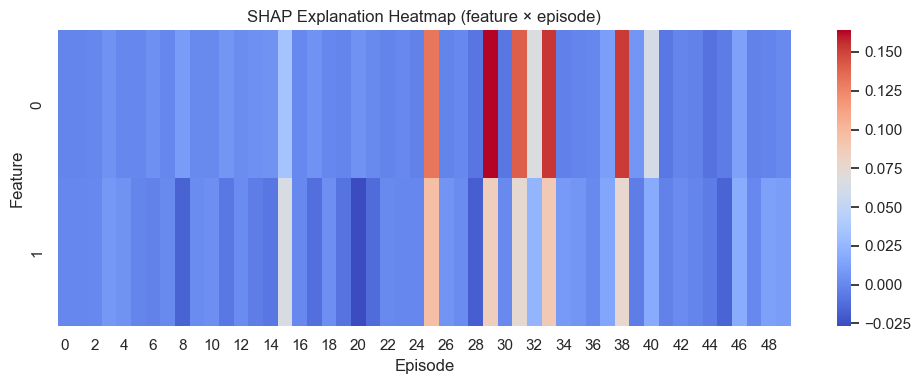

In [20]:
plt.figure(figsize=(10, 4))
sns.heatmap(shap_vals.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("SHAP Explanation Heatmap (feature × episode)")
plt.xlabel("Episode")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

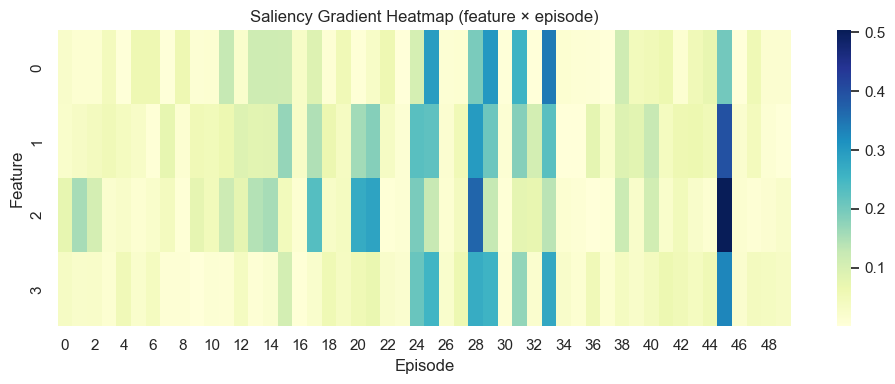

In [21]:
plt.figure(figsize=(10, 4))
sns.heatmap(saliency_vals.T, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Saliency Gradient Heatmap (feature × episode)")
plt.xlabel("Episode")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

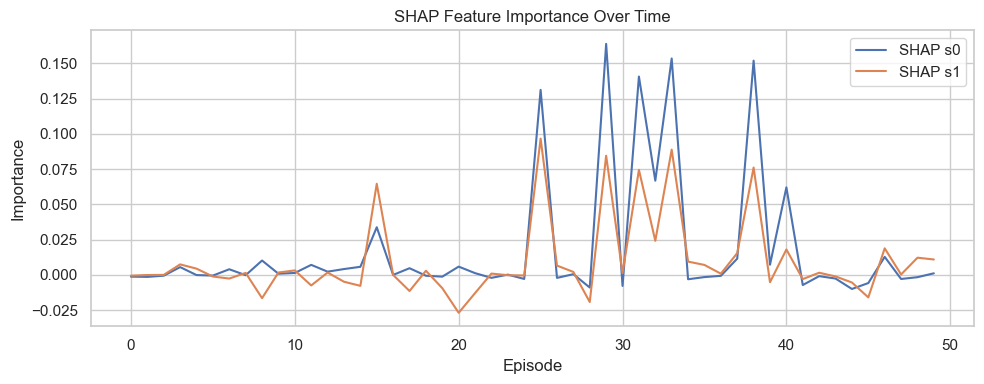

In [22]:
plt.figure(figsize=(10, 4))
for i in range(shap_vals.shape[1]):
    plt.plot(shap_vals[:, i], label=f"SHAP s{i}")
plt.title("SHAP Feature Importance Over Time")
plt.xlabel("Episode")
plt.ylabel("Importance")
plt.legend()
plt.tight_layout()
plt.show()